# Customer Segmentation and Forecasting 
Study Case : Qurban

created by : Hanindhiya Ika Septiana

---

**Contents:**
- Data Understanding
- Exploratory Data Analysis
  - Add Column (Years, Months, Date and Time)
  - Check Missing Values
  - Drop Duplicates
  - Pivot Table
  - Data Visualization
- Design Customer Segmentation
  - RFM Analysis
- Forecasting Model

In [ ]:
# import library
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Pre Processing & Forecasting
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/INTERNSHIP MIZAN/excel/Online dan Offline Transaksi Qurban 2019 - 2022 CFD _ INVOICE - excel.xlsx')
df.head()

,ID_Donatur,Nama_Donatur,Nama_Pequrban,Tanggal,Jenis_Hewan,Metode_Pembayaran,nominal,Kantor_Pelayanan,platform
0,8BC12276-0F4A-567E-F165-1AF16C5D49BE,SUTIKNO BIN KASMURI DJAMIN,SUTIKNO BIN KASMURI DJAMIN,2019-07-11 15:21:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline
1,0C51EE4C-1CD2-972B-5AE5-7A0325EF775F,SA'ANAH BINTI SA'ABAH,SA'ANAH BINTI SA'ABAH,2019-07-11 15:33:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline
2,9BBDC96A-7C53-0FE0-9513-C13BCB98853B,IKA,IKA LILIS WARDINA BINTI SUWARDI,2019-07-11 15:46:00,Kambing Super,Transfer,3000000,KP024,Offline
3,EF0746E1-4C1C-7E24-EF3A-699E35200668,SRI HANDAYANI,BUNDA SRI HANDAYANI,2019-07-12 23:29:00,Sapi Patungan 1/7,EDC,2500000,KP036,Offline
4,BDA7A62B-C475-B79C-71D2-2C528845549F,Fitria Narsa,Fitria Narsa,2019-07-15 20:25:00,Sapi Patungan 1/7,Tunai,2500000,KP001,Offline


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Donatur         1534 non-null   object        
 1   Nama_Donatur       1534 non-null   object        
 2   Nama_Pequrban      1533 non-null   object        
 3   Tanggal            1534 non-null   datetime64[ns]
 4   Jenis_Hewan        1534 non-null   object        
 5   Metode_Pembayaran  1534 non-null   object        
 6   nominal            1534 non-null   int64         
 7   Kantor_Pelayanan   1534 non-null   object        
 8   platform           1534 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 108.0+ KB


In [ ]:
df.shape

(1534, 9)

In [ ]:
df.describe()

,nominal
count,1.534000e+03
mean,2.148110e+06
std,2.405352e+06
min,0.000000e+00
25%,0.000000e+00
50%,2.600000e+06
75%,2.600000e+06
max,2.100000e+07


## Exploratory Data Analysis

### Add Column (Year, Month, Date and Time)

In [ ]:
df['Tanggal_1'] = df['Tanggal'].dt.date
df['Tahun'] = df['Tanggal'].dt.year
df['Bulan'] = df['Tanggal'].dt.month_name()
df['Waktu'] = df['Tanggal'].dt.time

df.head()

,ID_Donatur,Nama_Donatur,Nama_Pequrban,Tanggal,Jenis_Hewan,Metode_Pembayaran,nominal,Kantor_Pelayanan,platform,Tanggal_1,Tahun,Bulan,Waktu
0,8BC12276-0F4A-567E-F165-1AF16C5D49BE,SUTIKNO BIN KASMURI DJAMIN,SUTIKNO BIN KASMURI DJAMIN,2019-07-11 15:21:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline,2019-07-11,2019,July,15:21:00
1,0C51EE4C-1CD2-972B-5AE5-7A0325EF775F,SA'ANAH BINTI SA'ABAH,SA'ANAH BINTI SA'ABAH,2019-07-11 15:33:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline,2019-07-11,2019,July,15:33:00
2,9BBDC96A-7C53-0FE0-9513-C13BCB98853B,IKA,IKA LILIS WARDINA BINTI SUWARDI,2019-07-11 15:46:00,Kambing Super,Transfer,3000000,KP024,Offline,2019-07-11,2019,July,15:46:00
3,EF0746E1-4C1C-7E24-EF3A-699E35200668,SRI HANDAYANI,BUNDA SRI HANDAYANI,2019-07-12 23:29:00,Sapi Patungan 1/7,EDC,2500000,KP036,Offline,2019-07-12,2019,July,23:29:00
4,BDA7A62B-C475-B79C-71D2-2C528845549F,Fitria Narsa,Fitria Narsa,2019-07-15 20:25:00,Sapi Patungan 1/7,Tunai,2500000,KP001,Offline,2019-07-15,2019,July,20:25:00


### Check Missing Values

In [ ]:
df.isnull().sum()

ID_Donatur           0
Nama_Donatur         0
Nama_Pequrban        1
Tanggal              0
Jenis_Hewan          0
Metode_Pembayaran    0
nominal              0
Kantor_Pelayanan     0
platform             0
Tanggal_1            0
Tahun                0
Bulan                0
Waktu                0
dtype: int64

In [ ]:
df['Nama_Pequrban'].fillna(df['Nama_Pequrban'].value_counts().index[0], inplace=True)
df.isnull().sum()

ID_Donatur           0
Nama_Donatur         0
Nama_Pequrban        0
Tanggal              0
Jenis_Hewan          0
Metode_Pembayaran    0
nominal              0
Kantor_Pelayanan     0
platform             0
Tanggal_1            0
Tahun                0
Bulan                0
Waktu                0
dtype: int64

### Drop Duplicate

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.head()

,ID_Donatur,Nama_Donatur,Nama_Pequrban,Tanggal,Jenis_Hewan,Metode_Pembayaran,nominal,Kantor_Pelayanan,platform,Tanggal_1,Tahun,Bulan,Waktu
0,8BC12276-0F4A-567E-F165-1AF16C5D49BE,SUTIKNO BIN KASMURI DJAMIN,SUTIKNO BIN KASMURI DJAMIN,2019-07-11 15:21:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline,2019-07-11,2019,July,15:21:00
1,0C51EE4C-1CD2-972B-5AE5-7A0325EF775F,SA'ANAH BINTI SA'ABAH,SA'ANAH BINTI SA'ABAH,2019-07-11 15:33:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline,2019-07-11,2019,July,15:33:00
2,9BBDC96A-7C53-0FE0-9513-C13BCB98853B,IKA,IKA LILIS WARDINA BINTI SUWARDI,2019-07-11 15:46:00,Kambing Super,Transfer,3000000,KP024,Offline,2019-07-11,2019,July,15:46:00
3,EF0746E1-4C1C-7E24-EF3A-699E35200668,SRI HANDAYANI,BUNDA SRI HANDAYANI,2019-07-12 23:29:00,Sapi Patungan 1/7,EDC,2500000,KP036,Offline,2019-07-12,2019,July,23:29:00
4,BDA7A62B-C475-B79C-71D2-2C528845549F,Fitria Narsa,Fitria Narsa,2019-07-15 20:25:00,Sapi Patungan 1/7,Tunai,2500000,KP001,Offline,2019-07-15,2019,July,20:25:00


In [ ]:
df.tail()

,ID_Donatur,Nama_Donatur,Nama_Pequrban,Tanggal,Jenis_Hewan,Metode_Pembayaran,nominal,Kantor_Pelayanan,platform,Tanggal_1,Tahun,Bulan,Waktu
1529,7A3A2970-4731-BE38-FEC5-F3E947BABED0,FADLY MARISSATRIO & SITI UTAMI S W,FADLY MARISSATRIO BIN DICK SUTRISNO,2021-07-21 13:29:00,Kambing Hidup,Hewan Hidup,0,KP044,Offline,2021-07-21,2021,July,13:29:00
1530,D596CFF4-1F70-7F9C-BBD9-9F9AF7681D8C,Fika Rakhmatika Binti Abdullah Ishar,Fika Rakhmatika Binti Abdullah Ishar,2021-07-21 14:42:00,Kambing Hidup,Hewan Hidup,0,KP028,Offline,2021-07-21,2021,July,14:42:00
1531,2FE62201-FE90-6181-2D17-FE4221B196DD,bpk apriyanto,bpk apriyanto,2021-07-22 18:24:00,Kambing Hidup,Hewan Hidup,0,KP011,Offline,2021-07-22,2021,July,18:24:00
1532,D2EB720B-D2FE-AB6E-BC30-AF820C35EBA8,bpk kurniawan,Bapak Suhartono,2021-07-22 18:28:00,Kambing Hidup,Hewan Hidup,0,KP011,Offline,2021-07-22,2021,July,18:28:00
1533,FB0DB2F4-386D-670F-CDF1-4DFA830D9261,Rheza wahyu anjaya,Rheza wahyu anjaya bin heru mulyo widodo,2021-07-23 16:04:00,Kambing Hidup,Hewan Hidup,0,KP031,Offline,2021-07-23,2021,July,16:04:00


In [ ]:
df.shape

(1531, 13)

In [ ]:
# create a list of our conditions
def kategori(df):
  if df['Jenis_Hewan'] in ("Kambing / Domba 25 KG, Kambing / Domba 30 KG, Kambing Hidup, Kambing Palestina, Kambing Rohingya, Kambing Super"):
    return 'Kambing'
  else:
    return 'Sapi'
    
# display updated DataFrame
df['Kategori'] = df.apply(kategori, axis=1)

In [ ]:
df.head(10)

,ID_Donatur,Nama_Donatur,Nama_Pequrban,Tanggal,Jenis_Hewan,Metode_Pembayaran,nominal,Kantor_Pelayanan,platform,Tanggal_1,Tahun,Bulan,Waktu,Kategori
0,8BC12276-0F4A-567E-F165-1AF16C5D49BE,SUTIKNO BIN KASMURI DJAMIN,SUTIKNO BIN KASMURI DJAMIN,2019-07-11 15:21:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline,2019-07-11,2019,July,15:21:00,Sapi
1,0C51EE4C-1CD2-972B-5AE5-7A0325EF775F,SA'ANAH BINTI SA'ABAH,SA'ANAH BINTI SA'ABAH,2019-07-11 15:33:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline,2019-07-11,2019,July,15:33:00,Sapi
2,9BBDC96A-7C53-0FE0-9513-C13BCB98853B,IKA,IKA LILIS WARDINA BINTI SUWARDI,2019-07-11 15:46:00,Kambing Super,Transfer,3000000,KP024,Offline,2019-07-11,2019,July,15:46:00,Kambing
3,EF0746E1-4C1C-7E24-EF3A-699E35200668,SRI HANDAYANI,BUNDA SRI HANDAYANI,2019-07-12 23:29:00,Sapi Patungan 1/7,EDC,2500000,KP036,Offline,2019-07-12,2019,July,23:29:00,Sapi
4,BDA7A62B-C475-B79C-71D2-2C528845549F,Fitria Narsa,Fitria Narsa,2019-07-15 20:25:00,Sapi Patungan 1/7,Tunai,2500000,KP001,Offline,2019-07-15,2019,July,20:25:00,Sapi
5,3FB6AA7C-249A-8FDC-A6F2-19CBF5109FDC,SUYANTU,SUYANTU KEL,2019-07-16 13:15:00,Kambing Super,Tunai,3000000,KP043,Offline,2019-07-16,2019,July,13:15:00,Kambing
6,76245608-D72A-5F93-25FD-193199304005,HJ LISNADIA,HJ LISNADIA,2019-07-17 16:52:00,Kambing / Domba 30 KG,EDC,2500000,KP009,Offline,2019-07-17,2019,July,16:52:00,Kambing
7,3F513082-4FB4-3915-64B0-F28CA2D0B9E2,MOH RONNIE H.S,MOH RONNIE H.S,2019-07-17 17:02:00,Kambing / Domba 30 KG,EDC,2500000,KP009,Offline,2019-07-17,2019,July,17:02:00,Kambing
8,E67713D9-1185-4006-6426-8DC302222C98,MAISAROH HM,MAISAROH HM BINTI H.GOD,2019-07-19 14:10:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline,2019-07-19,2019,July,14:10:00,Sapi
9,4F4DE6FC-8901-565D-5A51-183F643DA359,Sri Damayanti,Tsabitah Salamah Putri Bambang Binti Bambang S...,2019-07-19 14:24:00,Kambing / Domba 30 KG,Tunai,2500000,KP013,Offline,2019-07-19,2019,July,14:24:00,Kambing


In [ ]:
df.loc[(df["Nama_Donatur"]== "Patrick")].reset_index()

,index,ID_Donatur,Nama_Donatur,Nama_Pequrban,Tanggal,Jenis_Hewan,Metode_Pembayaran,nominal,Kantor_Pelayanan,platform,Tanggal_1,Tahun,Bulan,Waktu,Kategori
0,1219,14FE5393-0F19-3876-C20D-C9ED5687A493,Patrick,Patrick,2021-07-15 13:40:00,Kambing / Domba 30 KG,Transfer,3000000,KP051,Offline,2021-07-15,2021,July,13:40:00,Kambing
1,1220,14FE5393-0F19-3876-C20D-C9ED5687A493,Patrick,Patrick,2021-07-15 13:45:00,Kambing / Domba 30 KG,Transfer,3000000,KP051,Offline,2021-07-15,2021,July,13:45:00,Kambing
2,1221,14FE5393-0F19-3876-C20D-C9ED5687A493,Patrick,Patrick,2021-07-15 13:47:00,Kambing / Domba 30 KG,Transfer,3000000,KP051,Offline,2021-07-15,2021,July,13:47:00,Kambing
3,1222,14FE5393-0F19-3876-C20D-C9ED5687A493,Patrick,Patrick,2021-07-15 13:50:00,Kambing / Domba 30 KG,Transfer,3000000,KP051,Offline,2021-07-15,2021,July,13:50:00,Kambing


In [ ]:
from google.colab import drive
df.to_excel( "/content/drive/My Drive/data_donatur.xlsx", index=False, encoding='utf-8-sig')

### Pivot Table

In [ ]:
df.pivot_table(values='Nama_Donatur', index = 'Tahun', \
                    aggfunc= ['count'], margins=True, margins_name='Grand Total')

,count
,Nama_Donatur
Tahun,
2019,532
2020,478
2021,521
Grand Total,1531


In [ ]:
df.pivot_table(values='Nama_Pequrban', index = 'Tahun', \
                    margins=True, margins_name='Grand Total', aggfunc= ['count'])

,count
,Nama_Pequrban
Tahun,
2019,532
2020,478
2021,521
Grand Total,1531


In [ ]:
df.pivot_table(values='Nama_Pequrban', index = 'Kategori', \
                    aggfunc= ['count'], margins=True, margins_name='Grand Total')

,count
,Nama_Pequrban
Kategori,
Kambing,1277
Sapi,254
Grand Total,1531


In [ ]:
df.pivot_table(values='Nama_Pequrban', index = 'Tanggal_1', \
                    aggfunc= ['count'], margins=True, margins_name='Grand Total')

,count
,Nama_Pequrban
Tanggal_1,
2019-07-11,3
2019-07-12,1
2019-07-15,1
2019-07-16,1
2019-07-17,2
...,...
2021-07-20,38
2021-07-21,11


In [ ]:
df.pivot_table(values='Nama_Pequrban', index = 'Tahun', \
                     columns= 'Jenis_Hewan', aggfunc= ['count'], fill_value=0, margins=True, margins_name='Grand Total')

count                                      \
Jenis_Hewan Kambing / Domba 25 KG Kambing / Domba 30 KG Kambing Hidup   
Tahun                                                                   
2019                            0                   191           128   
2020                            0                   219           148   
2021                          140                   154           154   
Grand Total                   140                   564           430   

                                                              \
Jenis_Hewan Kambing Palestina Kambing Rohingya Kambing Super   
Tahun                                                          
2019                        0                0           114   
2020                        7               17             5   
2021                        0                0             0   
Grand Total                 7               17           119   

                                                             \
Jenis_Hewan Sapi Full ± 300 KG Sapi Hidup Sapi Patungan 1/7   
Tahun                                                         
2019                         3          4                92   
2020                         7          5                66   
2021                        12          7                54   
Grand Total                 22         16               212   

                                                    
Jenis_Hewan Sapi Patungan 1/7 Rohingya Grand Total  
Tahun                                               
2019                                 0         532  
2020                                 4         478  
2021                                 0         521  
Grand Total                          4        1531

In [ ]:
df.pivot_table(values='Nama_Pequrban', index = 'Tahun', \
                     columns= 'Metode_Pembayaran', aggfunc= ['count'], fill_value=0, margins=True, margins_name='Grand Total')

count                                       
Metode_Pembayaran   EDC Hewan Hidup Transfer Tunai Grand Total
Tahun                                                         
2019                 56         124      117   235         532
2020                 53         153      117   155         478
2021                 53         161      183   124         521
Grand Total         162         438      417   514        1531

In [ ]:
df.pivot_table(values='nominal', index = 'Tahun', \
                     columns= 'Kategori', aggfunc= ['sum'], fill_value=0, margins=True, margins_name='Grand Total')

sum                       
Kategori        Kambing       Sapi Grand Total
Tahun                                         
2019          819500000  282500000  1102000000
2020          664600000  309400000   974000000
2021          807500000  389000000  1196500000
Grand Total  2291600000  980900000  3272500000

In [ ]:
df.pivot_table(values='nominal', index = 'Tahun', \
                     columns= 'Jenis_Hewan', aggfunc= ['sum'], fill_value=0, margins=True, margins_name='Grand Total')

sum                                      \
Jenis_Hewan Kambing / Domba 25 KG Kambing / Domba 30 KG Kambing Hidup   
Tahun                                                                   
2019                            0             477500000             0   
2020                            0             569400000             0   
2021                    358300000             449200000             0   
Grand Total             358300000            1496100000             0   

                                                              \
Jenis_Hewan Kambing Palestina Kambing Rohingya Kambing Super   
Tahun                                                          
2019                        0                0     342000000   
2020                 35000000         44200000      16000000   
2021                        0                0             0   
Grand Total          35000000         44200000     358000000   

                                                             \
Jenis_Hewan Sapi Full ± 300 KG Sapi Hidup Sapi Patungan 1/7   
Tahun                                                         
2019                  52500000          0         230000000   
2020                 127400000          0         171600000   
2021                 235000000          0         154000000   
Grand Total          414900000          0         555600000   

                                                    
Jenis_Hewan Sapi Patungan 1/7 Rohingya Grand Total  
Tahun                                               
2019                                 0  1102000000  
2020                          10400000   974000000  
2021                                 0  1196500000  
Grand Total                   10400000  3272500000

In [ ]:
df.pivot_table(values='Nama_Pequrban', index = 'Tahun', \
                     columns= 'Kantor_Pelayanan', aggfunc= ['count'], fill_value=0, margins=True, margins_name='Grand Total')

count                                                        \
Kantor_Pelayanan KP001 KP002 KP003 KP004 KP005 KP006 KP007 KP008 KP009 KP010   
Tahun                                                                          
2019                33    25    10    37    41    27     4     5    23     5   
2020                25    18    17    25    35    15     0     4    22     4   
2021                20    21    14    56    24    16     0     4    17     7   
Grand Total         78    64    41   118   100    58     4    13    62    16   

                  ...                                                        \
Kantor_Pelayanan  ... KP048 KP049 KP050 KP051 KP052 KP053 KP054 KP056 Kp047   
Tahun             ...                                                         
2019              ...     0     2     1     0     0     0     0     0     5   
2020              ...    15     3     7     4     9     0     0     0     7   
2021              ...     3     1     1     5    20     2     3     1     7   
Grand Total       ...    18     6     9     9    29     2     3     1    19   

                              
Kantor_Pelayanan Grand Total  
Tahun                         
2019                     532  
2020                     478  
2021                     521  
Grand Total             1531  

[4 rows x 51 columns]

In [ ]:
df.pivot_table(values='nominal', index = 'Tahun', \
                     columns= 'Kantor_Pelayanan', aggfunc= ['sum'], fill_value=0, margins=True, margins_name='Grand Total')

sum                                              \
Kantor_Pelayanan      KP001      KP002      KP003      KP004      KP005   
Tahun                                                                     
2019               64000000   72500000   22500000  105000000   88500000   
2020               54600000   62400000   44600000   72800000   64600000   
2021               46800000   55600000   38200000  140300000   73700000   
Grand Total       165400000  190500000  105300000  318100000  226800000   

                                                                     ...  \
Kantor_Pelayanan      KP006     KP007     KP008     KP009     KP010  ...   
Tahun                                                                ...   
2019               61000000  10500000  13500000  38500000  10000000  ...   
2020               50000000         0   5200000  33800000  23400000  ...   
2021               40800000         0  11600000  18600000  13800000  ...   
Grand Total       151800000  10500000  30300000  90900000  47200000  ...   

                                                                             \
Kantor_Pelayanan     KP048     KP049     KP050     KP051     KP052    KP053   
Tahun                                                                         
2019                     0   5000000   2500000         0         0        0   
2020              31000000   7800000  10400000  10400000  18200000        0   
2021                     0   2600000   3000000  15000000  16400000  5600000   
Grand Total       31000000  15400000  15900000  25400000  34600000  5600000   

                                                       
Kantor_Pelayanan KP054    KP056     Kp047 Grand Total  
Tahun                                                  
2019                 0        0  13500000  1102000000  
2020                 0        0  15600000   974000000  
2021                 0  2600000  36000000  1196500000  
Grand Total          0  2600000  65100000  3272500000  

[4 rows x 51 columns]

### Data Visualization

#### **Donatur**

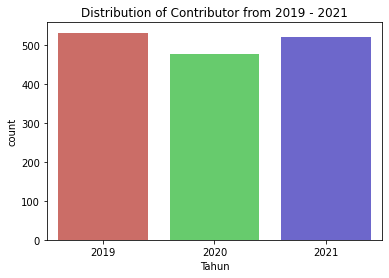

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Distribution of Contributor from 2019 - 2021')
sns.countplot(x='Tahun', data=df, palette='hls');

#### **Jenis Hewan**

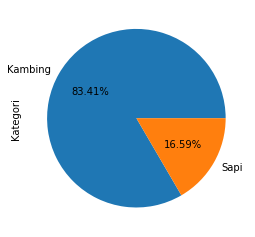

In [ ]:
data = df['Kategori'].value_counts()

plt.figure(figsize=(4,5))
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

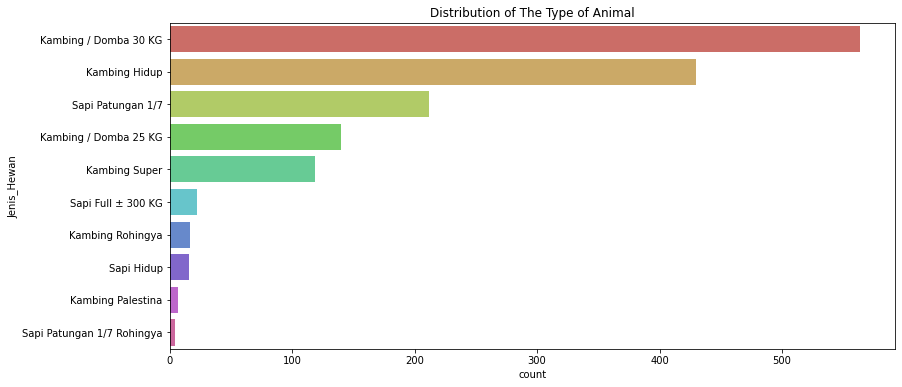

In [ ]:
order_hewan = df['Jenis_Hewan'].value_counts().index

plt.figure(figsize=(13,6))
ax = sns.countplot(data = df , y = 'Jenis_Hewan', order = order_hewan, palette='hls')
plt.title('Distribution of The Type of Animal')
    
plt.show()

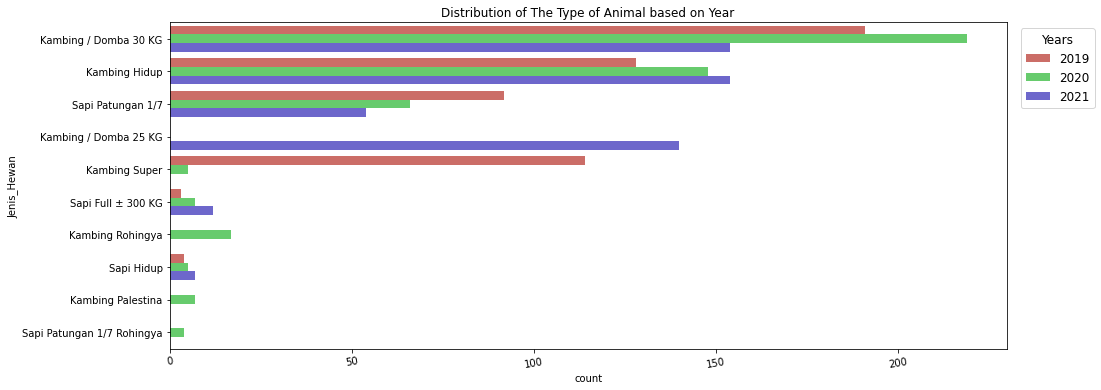

In [ ]:
order_hewan = df['Jenis_Hewan'].value_counts().index

plt.figure(figsize=(15,6))
ax = sns.countplot(data = df , y = 'Jenis_Hewan', order = order_hewan, hue="Tahun", palette='hls')
ax.legend(fontsize = 12, \
               bbox_to_anchor= (1.01, 1), \
               title="Years", \
               title_fontsize = 12);
plt.title('Distribution of The Type of Animal based on Year')
plt.xticks(rotation = 10)

plt.show()

#### **Kantor Pelayanan**

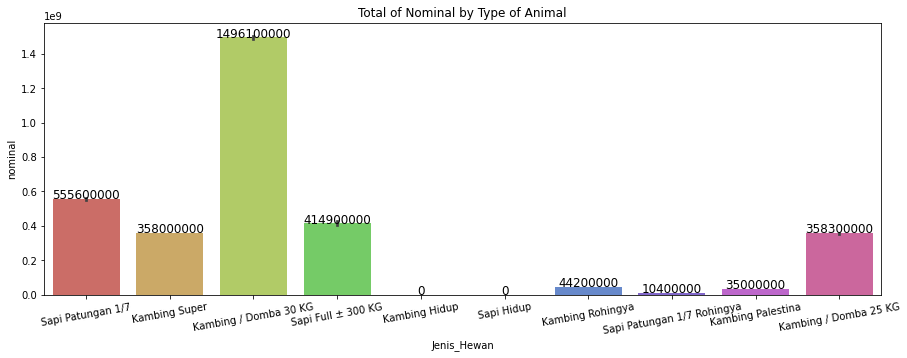

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Total of Nominal by Type of Animal')
ax = sns.barplot(data = df , x = 'Jenis_Hewan', y="nominal", estimator=sum, palette='hls')
plt.xticks(rotation = 10)

# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 12)
    
plt.show()

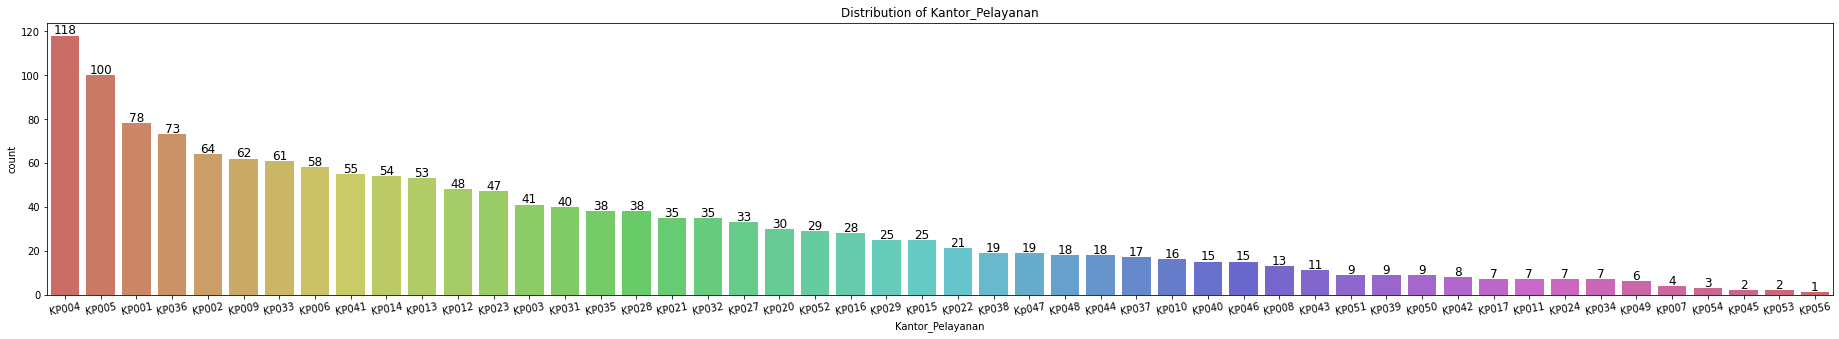

In [ ]:
order_kantor = df['Kantor_Pelayanan'].value_counts().index

plt.figure(figsize=(32,5))
ax = sns.countplot(data = df , x = 'Kantor_Pelayanan', order = order_kantor, palette='hls')
plt.title('Distribution of Kantor_Pelayanan')
plt.xticks(rotation = 10)

# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.show()

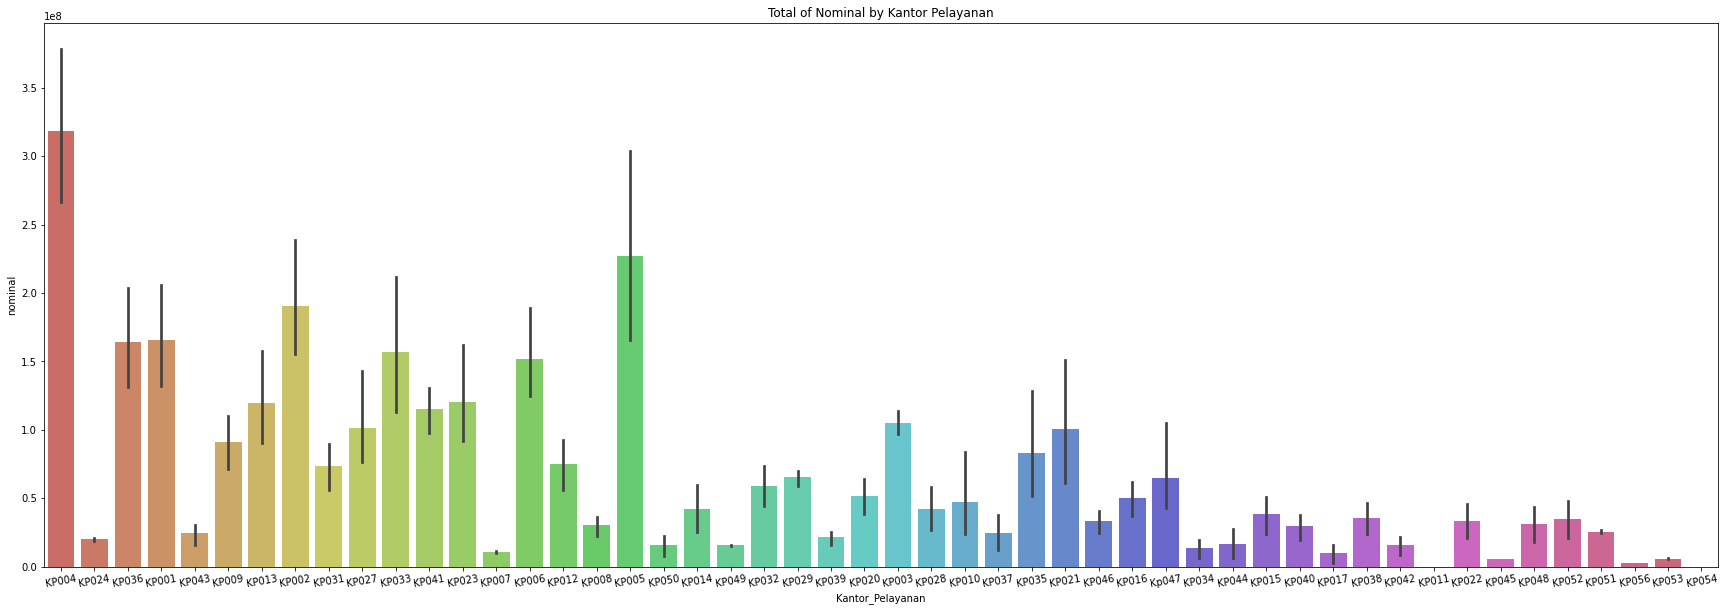

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Total of Nominal by Kantor Pelayanan')
ax = sns.barplot(data = df , x = 'Kantor_Pelayanan', y="nominal", estimator=sum, palette='hls')
plt.xticks(rotation = 10)

plt.show()

#### **Metode Pembayaran**

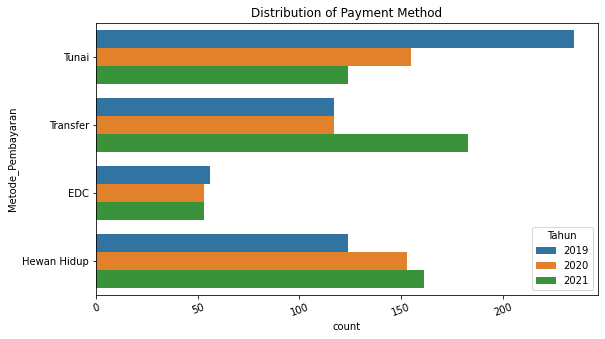

In [ ]:
plt.figure(figsize=(9,5))
plt.title('Distribution of Payment Method')
ax = sns.countplot(data = df , y = 'Metode_Pembayaran', hue = 'Tahun')
plt.xticks(rotation = 20)
plt.show()

## Designing Customer Segmentation

#### Recency (R)

In [ ]:
#Calculate total_amount of money for each order
df.Tanggal_1 = pd.to_datetime(df.Tanggal_1)
reference_date = pd.Timestamp.now() + dt.timedelta(days = 1)

#Taking a reference date to calculate the gap between this reference date and the last purchase date of each customer.
#The gap can be referred as the recency of each customer
df['days_from_last_purchase'] = (reference_date - df.Tanggal_1).astype('timedelta64[D]')
df['days_from_last_purchase'] = df['days_from_last_purchase'].astype(int)

lastpurchase_day = df[['ID_Donatur','days_from_last_purchase']].groupby('ID_Donatur').min().reset_index()
lastpurchase_day.rename(columns={'days_from_last_purchase':'recency'}, inplace=True)

lastpurchase_day.head()

,ID_Donatur,recency
0,000CB4F6-62AF-798F-3639-AD95CCD09DA5,373
1,003CBFE2-55BC-802A-1A5D-108C6918AD34,1074
2,00502678-2F56-F869-7CB6-9F75AE53026A,1074
3,00A30DA8-F52C-7FAE-2303-4670E58EB3D5,1077
4,00B3888A-A3BA-233B-A991-0FBB4C403560,748


In [ ]:
reference_date = pd.Timestamp.now() 
reference_date

Timestamp('2022-07-17 03:29:54.191694')

In [ ]:
# Descriptive Statistics 
lastpurchase_day.describe()

,recency
count,1275.000000
mean,718.730196
std,296.489088
min,360.000000
25%,370.500000
50%,720.000000
75%,1073.000000
max,1103.000000


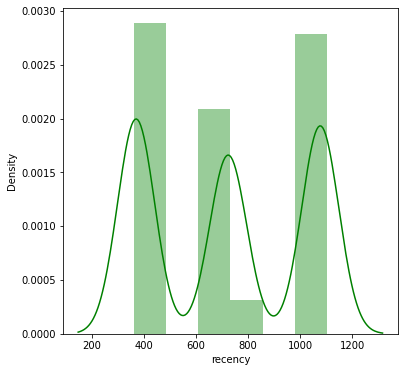

In [ ]:
# Recency Distribution Plot
plt.figure(figsize=(6,6))
sns.distplot(lastpurchase_day['recency'], color='g')
plt.ylabel('Density')
plt.show()

#### Frequency (F)

In [ ]:
#Calculate number of orders purchased by each customer
freq = df[['ID_Donatur','Metode_Pembayaran']].groupby(['ID_Donatur','Metode_Pembayaran']).count().reset_index().\
groupby(["ID_Donatur"]).count().reset_index()
freq.rename(columns = {'Metode_Pembayaran':'frequency'}, inplace = True)

freq.head()

,ID_Donatur,frequency
0,000CB4F6-62AF-798F-3639-AD95CCD09DA5,2
1,003CBFE2-55BC-802A-1A5D-108C6918AD34,1
2,00502678-2F56-F869-7CB6-9F75AE53026A,1
3,00A30DA8-F52C-7FAE-2303-4670E58EB3D5,1
4,00B3888A-A3BA-233B-A991-0FBB4C403560,1


In [ ]:
# Descriptive Statistics 
freq.describe()

,frequency
count,1275.000000
mean,1.023529
std,0.151637
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


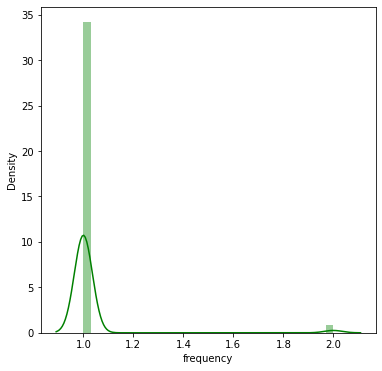

In [ ]:
# Frequency Distribution Plot
plt.figure(figsize=(6,6))
sns.distplot(freq['frequency'], color='g')
plt.ylabel('Density')
plt.show()

#### Monetary (M)

In [ ]:
#Total amount of money spent per customer
money = df[['ID_Donatur','nominal']].groupby('ID_Donatur').sum().reset_index()
money.rename(columns = {'nominal':'monetary'}, inplace = True)

money.head()

,ID_Donatur,monetary
0,000CB4F6-62AF-798F-3639-AD95CCD09DA5,5100000
1,003CBFE2-55BC-802A-1A5D-108C6918AD34,0
2,00502678-2F56-F869-7CB6-9F75AE53026A,6000000
3,00A30DA8-F52C-7FAE-2303-4670E58EB3D5,6000000
4,00B3888A-A3BA-233B-A991-0FBB4C403560,2600000


In [ ]:
# Descriptive Statistics 
money.describe()

,monetary
count,1.275000e+03
mean,2.566667e+06
std,3.332158e+06
min,0.000000e+00
25%,0.000000e+00
50%,2.600000e+06
75%,3.000000e+06
max,3.920000e+07


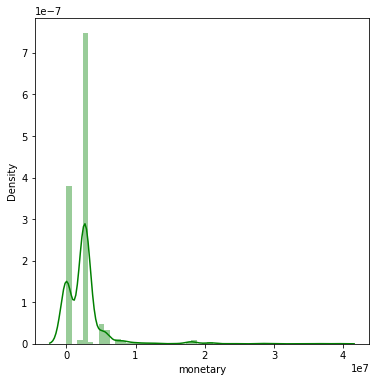

In [ ]:
# Recency Distribution Plot
plt.figure(figsize=(6,6))
sns.distplot(money['monetary'], color='g')
plt.ylabel('Density')
plt.show()

#### Combine R-F-M 

In [ ]:
# Grouping by CustomerID and Calculation frequency 
rfm = df.groupby(['ID_Donatur']).agg({
        'Tanggal_1': lambda x: (reference_date - x.max()).days,
        'Metode_Pembayaran': 'count',
        'nominal': 'sum'})

# Rename the columns 
rfm.rename(columns={'Tanggal_1': 'Recency',
                         'Metode_Pembayaran': 'Frequency',
                         'nominal': 'Monetary'}, inplace=True)

In [ ]:
#Calculating quantile values
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0, .2 , .5, .7]).to_dict()

###Benchmark to give score for recency indicator
def r_score(r):
    if r < quintiles['Recency'][.2]:
        return 4
    elif r < quintiles['Recency'][.5]:
        return 3
    elif r < quintiles['Recency'][.7]:
        return 2
    else: 
        return 1

###Benchmark to give score for frequency indicator.   
def f_score(f): 
    if f >= 3: 
        return 3
    elif f == 2: 
        return 2
    else: 
        return 1

###Benchmark to give score for monetary indicator.   
def m_score(m): 
    if m > quintiles['Monetary'][.7]: 
        return 4
    elif m > quintiles['Monetary'][.5]: 
        return 3
    elif m > quintiles['Monetary'][.2]: 
        return 2
    else: 
        return 1

In [ ]:
rfm = rfm[rfm["Monetary"] > 0]
rfm

,Recency,Frequency,Monetary
ID_Donatur,,,
000CB4F6-62AF-798F-3639-AD95CCD09DA5,372,2,5100000
00502678-2F56-F869-7CB6-9F75AE53026A,1073,2,6000000
00A30DA8-F52C-7FAE-2303-4670E58EB3D5,1076,2,6000000
00B3888A-A3BA-233B-A991-0FBB4C403560,747,1,2600000
01281812-15E8-9615-23B7-D88A1BE107A4,384,1,2100000
...,...,...,...
FEB6EF5A-B991-8BEA-F763-44716A723223,1079,1,2500000
FED18601-5736-7233-0798-7823CC9578D9,379,1,2600000
FF7608D1-D298-2910-136E-F9CE75DDD70C,1072,1,2500000


In [ ]:
# Define rfm_score function
rfm2 = rfm.copy()
rfm2['r_score'] = rfm2.Recency.apply(lambda x: r_score(x))
rfm2['f_score'] = rfm2.Frequency.apply(lambda x: f_score(x))
rfm2['m_score'] = rfm2.Monetary.apply(lambda x: m_score(x))
rfm2['rfm'] = rfm2['r_score'].map(str)+rfm2['f_score'].map(str) + rfm2['m_score'].map(str)
rfm2['rfm_Score'] = rfm2[['r_score','f_score','m_score']].sum(axis=1)

# Define rfm_level function 
def rfm_level(df):
    if df['rfm_Score'] >= 9:
        return 'Champions'
    elif ((df['rfm_Score'] >= 8) and (df['rfm_Score'] < 9)):
        return 'Loyal Customers'
    elif ((df['rfm_Score'] >= 7) and (df['rfm_Score'] < 8)):
        return 'Potential Loyalist'
    elif ((df['rfm_Score'] >= 6) and (df['rfm_Score'] < 7)):
        return 'Promising'
    elif ((df['rfm_Score'] >= 5) and (df['rfm_Score'] < 6)):
        return "Can't Loose Them"
    else:
        return 'Lost'
    
# Create a new variable RFM_Level
rfm2['RFM_Level'] = rfm2.apply(rfm_level, axis=1)

rfm2.reset_index().head(10)

,ID_Donatur,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm,rfm_Score,RFM_Level
0,000CB4F6-62AF-798F-3639-AD95CCD09DA5,372,2,5100000,3,2,4,324,9,Champions
1,00502678-2F56-F869-7CB6-9F75AE53026A,1073,2,6000000,1,2,4,124,7,Potential Loyalist
2,00A30DA8-F52C-7FAE-2303-4670E58EB3D5,1076,2,6000000,1,2,4,124,7,Potential Loyalist
3,00B3888A-A3BA-233B-A991-0FBB4C403560,747,1,2600000,2,1,2,212,5,Can't Loose Them
4,01281812-15E8-9615-23B7-D88A1BE107A4,384,1,2100000,3,1,2,312,6,Promising
5,01470F9B-F668-774F-E20E-F046F8CEBB4A,723,1,2600000,2,1,2,212,5,Can't Loose Them
6,01653BA7-8910-9D6F-6478-94A11F0A4DC7,390,1,2100000,3,1,2,312,6,Promising
7,0174960F-BED6-2D42-CB72-8829AF625522,372,1,2600000,3,1,2,312,6,Promising
8,01C9D447-60A5-D490-D224-3EDD92F3D1AD,1074,1,3000000,1,1,4,114,6,Promising
9,01EB63F4-4931-764D-A944-6F67B38CA2A0,1093,1,2500000,1,1,2,112,4,Lost


In [ ]:
count_rfm = rfm2['rfm_Score'].value_counts()
count_rfm

6     229
4     204
5     172
9      90
8      87
7      72
10     34
11      8
Name: rfm_Score, dtype: int64

In [ ]:
count_rfm = rfm2['RFM_Level'].value_counts()
count_rfm

Promising             229
Lost                  204
Can't Loose Them      172
Champions             132
Loyal Customers        87
Potential Loyalist     72
Name: RFM_Level, dtype: int64

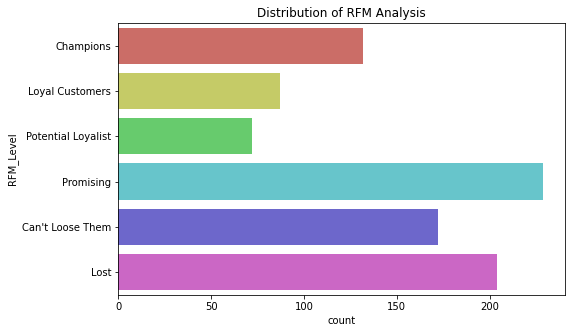

In [ ]:
plt.figure(figsize=(8,5))
rfm_level = ["Champions","Loyal Customers","Potential Loyalist","Promising","Can't Loose Them","Lost"]
plt.title('Distribution of RFM Analysis')
sns.countplot(y='RFM_Level', data=rfm2, palette='hls', order = rfm_level);

In [ ]:
rfm2.reset_index()

,ID_Donatur,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm,rfm_Score,RFM_Level
0,000CB4F6-62AF-798F-3639-AD95CCD09DA5,372,2,5100000,3,2,4,324,9,Champions
1,00502678-2F56-F869-7CB6-9F75AE53026A,1073,2,6000000,1,2,4,124,7,Potential Loyalist
2,00A30DA8-F52C-7FAE-2303-4670E58EB3D5,1076,2,6000000,1,2,4,124,7,Potential Loyalist
3,00B3888A-A3BA-233B-A991-0FBB4C403560,747,1,2600000,2,1,2,212,5,Can't Loose Them
4,01281812-15E8-9615-23B7-D88A1BE107A4,384,1,2100000,3,1,2,312,6,Promising
...,...,...,...,...,...,...,...,...,...,...
891,FEB6EF5A-B991-8BEA-F763-44716A723223,1079,1,2500000,1,1,2,112,4,Lost
892,FED18601-5736-7233-0798-7823CC9578D9,379,1,2600000,3,1,2,312,6,Promising
893,FF7608D1-D298-2910-136E-F9CE75DDD70C,1072,1,2500000,1,1,2,112,4,Lost
894,FFAEE6BB-5AE9-49B3-EB7C-89FDED4EDBBE,1079,1,2500000,1,1,2,112,4,Lost


In [ ]:
# filtering RFM Level 
rfm2.loc[(rfm2["RFM_Level"] == "Champions")].sort_values(by=['rfm_Score'], ascending=False).reset_index().head(20)

,ID_Donatur,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm,rfm_Score,RFM_Level
0,85B72339-CDE6-A0B7-B67A-30EB28EFD122,363,10,28400000,4,3,4,434,11,Champions
1,20F6ACB2-B4F5-C786-B687-C0D2807113BE,363,3,7700000,4,3,4,434,11,Champions
2,55706816-897F-3843-F1E1-44C9759DFE9E,363,4,12000000,4,3,4,434,11,Champions
3,54051294-4791-FFA5-FCA1-7F07DED5A273,363,6,15600000,4,3,4,434,11,Champions
4,C5D4D68B-30CC-22E0-357A-109BC8FD9D6A,363,3,8100000,4,3,4,434,11,Champions
5,9ACC673E-D06D-8451-B278-1AACE700436B,365,7,18200000,4,3,4,434,11,Champions
6,2163BD10-00DC-B2D4-B795-5C2918CF58AF,365,3,9000000,4,3,4,434,11,Champions
7,D2F4954B-E023-1F0A-5210-5A7CF426BC72,363,3,8200000,4,3,4,434,11,Champions
8,CA5745D0-A173-D148-5964-AB9DB10705A8,386,3,7700000,3,3,4,334,10,Champions
9,49609652-FBD0-9E2C-1D96-BAD29A6F49C0,383,3,8800000,3,3,4,334,10,Champions


In [ ]:
# df.loc[(df["ID_Donatur"]== "54556125-6A9E-2451-498F-12A7A69198D0")].sort_values(by=['days_from_last_purchase'], ascending=True).reset_index()

## Designing Forecasting Model

In [ ]:
!pip install pystan fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_hewan = df.copy()
df_hewan.head()

,ID_Donatur,Nama_Donatur,Nama_Pequrban,Tanggal,Jenis_Hewan,Metode_Pembayaran,nominal,Kantor_Pelayanan,platform,Tanggal_1,Tahun,Bulan,Waktu,Kategori,days_from_last_purchase
0,8BC12276-0F4A-567E-F165-1AF16C5D49BE,SUTIKNO BIN KASMURI DJAMIN,SUTIKNO BIN KASMURI DJAMIN,2019-07-11 15:21:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline,2019-07-11,2019,July,15:21:00,Sapi,1103
1,0C51EE4C-1CD2-972B-5AE5-7A0325EF775F,SA'ANAH BINTI SA'ABAH,SA'ANAH BINTI SA'ABAH,2019-07-11 15:33:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline,2019-07-11,2019,July,15:33:00,Sapi,1103
2,9BBDC96A-7C53-0FE0-9513-C13BCB98853B,IKA,IKA LILIS WARDINA BINTI SUWARDI,2019-07-11 15:46:00,Kambing Super,Transfer,3000000,KP024,Offline,2019-07-11,2019,July,15:46:00,Kambing,1103
3,EF0746E1-4C1C-7E24-EF3A-699E35200668,SRI HANDAYANI,BUNDA SRI HANDAYANI,2019-07-12 23:29:00,Sapi Patungan 1/7,EDC,2500000,KP036,Offline,2019-07-12,2019,July,23:29:00,Sapi,1102
4,BDA7A62B-C475-B79C-71D2-2C528845549F,Fitria Narsa,Fitria Narsa,2019-07-15 20:25:00,Sapi Patungan 1/7,Tunai,2500000,KP001,Offline,2019-07-15,2019,July,20:25:00,Sapi,1099


In [ ]:
df_hewan['ds'] = df['Tanggal'].dt.year
df_hewan['Month'] = df['Tanggal'].dt.month
df_hewan['Day'] = df['Tanggal'].dt.day
df_hewan['ds'] = pd.DatetimeIndex(df_hewan['Year'].apply(str)+'-'+df_hewan['Month'].apply(str)+'-'+df_hewan['Day'].apply(str))

df_hewan.head()

,ID_Donatur,Nama_Donatur,Nama_Pequrban,Tanggal,Jenis_Hewan,Metode_Pembayaran,nominal,Kantor_Pelayanan,platform,Tanggal_1,Tahun,Bulan,Waktu,Kategori,days_from_last_purchase,Year,Month,Day,ds
0,8BC12276-0F4A-567E-F165-1AF16C5D49BE,SUTIKNO BIN KASMURI DJAMIN,SUTIKNO BIN KASMURI DJAMIN,2019-07-11 15:21:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline,2019-07-11,2019,July,15:21:00,Sapi,1103,2019,7,11,2019-07-11
1,0C51EE4C-1CD2-972B-5AE5-7A0325EF775F,SA'ANAH BINTI SA'ABAH,SA'ANAH BINTI SA'ABAH,2019-07-11 15:33:00,Sapi Patungan 1/7,Tunai,2500000,KP004,Offline,2019-07-11,2019,July,15:33:00,Sapi,1103,2019,7,11,2019-07-11
2,9BBDC96A-7C53-0FE0-9513-C13BCB98853B,IKA,IKA LILIS WARDINA BINTI SUWARDI,2019-07-11 15:46:00,Kambing Super,Transfer,3000000,KP024,Offline,2019-07-11,2019,July,15:46:00,Kambing,1103,2019,7,11,2019-07-11
3,EF0746E1-4C1C-7E24-EF3A-699E35200668,SRI HANDAYANI,BUNDA SRI HANDAYANI,2019-07-12 23:29:00,Sapi Patungan 1/7,EDC,2500000,KP036,Offline,2019-07-12,2019,July,23:29:00,Sapi,1102,2019,7,12,2019-07-12
4,BDA7A62B-C475-B79C-71D2-2C528845549F,Fitria Narsa,Fitria Narsa,2019-07-15 20:25:00,Sapi Patungan 1/7,Tunai,2500000,KP001,Offline,2019-07-15,2019,July,20:25:00,Sapi,1099,2019,7,15,2019-07-15


In [ ]:
df_hewan[df_hewan.Year == 2021]

,ID_Donatur,Nama_Donatur,Nama_Pequrban,Tanggal,Jenis_Hewan,Metode_Pembayaran,nominal,Kantor_Pelayanan,platform,Tanggal_1,Tahun,Bulan,Waktu,Kategori,days_from_last_purchase,Year,Month,Day,ds
1012,E8D7F7EF-BAAD-8EAD-7B19-2C1820040FE4,Sukiswantini,NY SUMIYEM,2021-06-11 16:33:00,Sapi Patungan 1/7,Transfer,2600000,KP027,Offline,2021-06-11,2021,June,16:33:00,Sapi,402,2021,6,11,2021-06-11
1013,E8D7F7EF-BAAD-8EAD-7B19-2C1820040FE4,Sukiswantini,ALM BAPAK SAJIYO,2021-06-11 16:58:00,Sapi Patungan 1/7,Transfer,2600000,KP027,Offline,2021-06-11,2021,June,16:58:00,Sapi,402,2021,6,11,2021-06-11
1014,E8D7F7EF-BAAD-8EAD-7B19-2C1820040FE4,Sukiswantini,SUKISWANTINI,2021-06-11 17:00:00,Sapi Patungan 1/7,Transfer,2600000,KP027,Offline,2021-06-11,2021,June,17:00:00,Sapi,402,2021,6,11,2021-06-11
1015,E8D7F7EF-BAAD-8EAD-7B19-2C1820040FE4,Sukiswantini,SULTHAN BONANZA IQBALSYAH,2021-06-11 17:01:00,Sapi Patungan 1/7,Transfer,2600000,KP027,Offline,2021-06-11,2021,June,17:01:00,Sapi,402,2021,6,11,2021-06-11
1016,F5427815-19E5-AD56-AB5C-23D8843D250C,DE NIZAM,DE NIZAM,2021-06-11 17:02:00,Kambing / Domba 30 KG,Tunai,2600000,KP043,Offline,2021-06-11,2021,June,17:02:00,Kambing,402,2021,6,11,2021-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,7A3A2970-4731-BE38-FEC5-F3E947BABED0,FADLY MARISSATRIO & SITI UTAMI S W,FADLY MARISSATRIO BIN DICK SUTRISNO,2021-07-21 13:29:00,Kambing Hidup,Hewan Hidup,0,KP044,Offline,2021-07-21,2021,July,13:29:00,Kambing,362,2021,7,21,2021-07-21
1530,D596CFF4-1F70-7F9C-BBD9-9F9AF7681D8C,Fika Rakhmatika Binti Abdullah Ishar,Fika Rakhmatika Binti Abdullah Ishar,2021-07-21 14:42:00,Kambing Hidup,Hewan Hidup,0,KP028,Offline,2021-07-21,2021,July,14:42:00,Kambing,362,2021,7,21,2021-07-21
1531,2FE62201-FE90-6181-2D17-FE4221B196DD,bpk apriyanto,bpk apriyanto,2021-07-22 18:24:00,Kambing Hidup,Hewan Hidup,0,KP011,Offline,2021-07-22,2021,July,18:24:00,Kambing,361,2021,7,22,2021-07-22
1532,D2EB720B-D2FE-AB6E-BC30-AF820C35EBA8,bpk kurniawan,Bapak Suhartono,2021-07-22 18:28:00,Kambing Hidup,Hewan Hidup,0,KP011,Offline,2021-07-22,2021,July,18:28:00,Kambing,361,2021,7,22,2021-07-22


### Forecasting Jumlah Hewan **(Kambing)**

In [ ]:
#df_kambing = df_hewan.loc[(df_hewan["Kategori"] == "Kambing") & (df_hewan["Jenis_Hewan"] != "Kambing Hidup")].groupby(['ds','Jenis_Hewan']).agg(Jumlah_Hewan=('ds','count')).reset_index()

In [ ]:
# Select the date and stock 
kambing = df_hewan.loc[(df_hewan["Kategori"] == "Kambing") & (df_hewan["Jenis_Hewan"] != "Kambing Hidup")].groupby(['ds']).agg(Jumlah_Hewan=('ds','count')).reset_index()

# Rename the features
kambing.columns = ['ds', 'y']

kambing

,ds,y
0,2019-07-11,1
1,2019-07-16,1
2,2019-07-17,2
3,2019-07-19,2
4,2019-07-20,5
...,...,...
93,2021-07-17,19
94,2021-07-18,29
95,2021-07-19,51
96,2021-07-20,9


In [ ]:
# Getting the Facebook prophet Library 
from fbprophet import Prophet

# Creating the Prophet Object (model)
m_kambing = Prophet(daily_seasonality=True)

# Fit or train the model
model = m_kambing.fit(kambing)
future_kambing = m_kambing.make_future_dataframe(periods=365,freq='D')
forecast_kambing = m_kambing.predict(future_kambing)

forecast_kambing.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-11,-19.944636,-14.546742,5.576877,-19.944636,-19.944636,15.444781,15.444781,15.444781,-318.959417,...,0.830484,0.830484,0.830484,333.573714,333.573714,333.573714,0.0,0.0,0.0,-4.499855
1,2019-07-16,-19.842450,-11.132248,9.031711,-19.842450,-19.842450,19.368010,19.368010,19.368010,-318.959417,...,-1.074547,-1.074547,-1.074547,339.401975,339.401975,339.401975,0.0,0.0,0.0,-0.474439
2,2019-07-17,-19.822013,-8.899092,10.953242,-19.822013,-19.822013,20.727338,20.727338,20.727338,-318.959417,...,-0.744163,-0.744163,-0.744163,340.430918,340.430918,340.430918,0.0,0.0,0.0,0.905325
3,2019-07-19,-19.781138,-6.222488,13.564032,-19.781138,-19.781138,22.963801,22.963801,22.963801,-318.959417,...,-0.087493,-0.087493,-0.087493,342.010711,342.010711,342.010711,0.0,0.0,0.0,3.182663
4,2019-07-20,-19.760701,-5.217787,14.871177,-19.760701,-19.760701,24.358132,24.358132,24.358132,-318.959417,...,0.802163,0.802163,0.802163,342.515386,342.515386,342.515386,0.0,0.0,0.0,4.597431


In [ ]:
forecast_kambing[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-07-11,-4.499855,-14.546742,5.576877
1,2019-07-16,-0.474439,-11.132248,9.031711
2,2019-07-17,0.905325,-8.899092,10.953242
3,2019-07-19,3.182663,-6.222488,13.564032
4,2019-07-20,4.597431,-5.217787,14.871177


In [ ]:
# Import the facebooks prophet plotting libraries
from fbprophet.plot import plot_plotly, plot_components_plotly

# Plot the Data
plot_plotly(m_kambing, forecast_kambing)

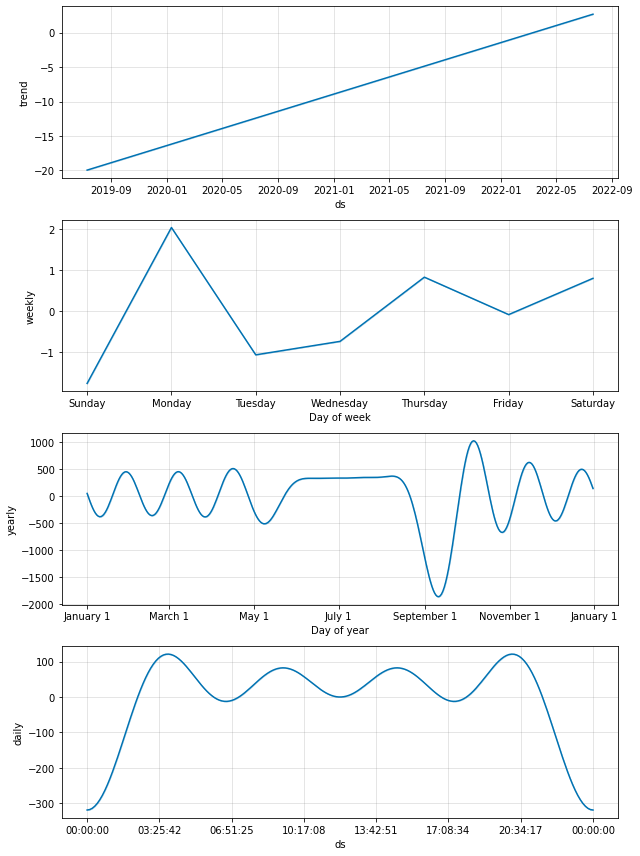

In [ ]:
plt2 = m_kambing.plot_components(forecast_kambing)

In [ ]:
# Show the Actual Value for Qurban
kambing[kambing.ds == '2019-08-11' ]['y']

26    12
Name: y, dtype: int64

In [ ]:
# Show the Models Prediction for Qurban
forecast_kambing[forecast_kambing.ds == '2022-07-01']['yhat'].apply(int)

442    13
Name: yhat, dtype: int64

In [ ]:
# Merge the Predict and Actual table for Qurban
left_join_k = pd.merge(forecast_kambing, kambing, on ='ds', how ='left')
left_join_k.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
0,2019-07-11,-19.944636,-14.546742,5.576877,-19.944636,-19.944636,15.444781,15.444781,15.444781,-318.959417,...,0.830484,0.830484,333.573714,333.573714,333.573714,0.0,0.0,0.0,-4.499855,1.0
1,2019-07-16,-19.842450,-11.132248,9.031711,-19.842450,-19.842450,19.368010,19.368010,19.368010,-318.959417,...,-1.074547,-1.074547,339.401975,339.401975,339.401975,0.0,0.0,0.0,-0.474439,1.0
2,2019-07-17,-19.822013,-8.899092,10.953242,-19.822013,-19.822013,20.727338,20.727338,20.727338,-318.959417,...,-0.744163,-0.744163,340.430918,340.430918,340.430918,0.0,0.0,0.0,0.905325,2.0
3,2019-07-19,-19.781138,-6.222488,13.564032,-19.781138,-19.781138,22.963801,22.963801,22.963801,-318.959417,...,-0.087493,-0.087493,342.010711,342.010711,342.010711,0.0,0.0,0.0,3.182663,2.0
4,2019-07-20,-19.760701,-5.217787,14.871177,-19.760701,-19.760701,24.358132,24.358132,24.358132,-318.959417,...,0.802163,0.802163,342.515386,342.515386,342.515386,0.0,0.0,0.0,4.597431,5.0


In [ ]:
# Show Predict and Actual for Qurban
left_join_k[['ds','y','yhat','yhat_lower','yhat_upper']]

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-07-11,1.0,-4.499855,-14.546742,5.576877
1,2019-07-16,1.0,-0.474439,-11.132248,9.031711
2,2019-07-17,2.0,0.905325,-8.899092,10.953242
3,2019-07-19,2.0,3.182663,-6.222488,13.564032
4,2019-07-20,5.0,4.597431,-5.217787,14.871177
...,...,...,...,...,...
458,2022-07-17,NaN,22.508697,12.229659,32.719472
459,2022-07-18,NaN,27.190021,17.442394,36.346127
460,2022-07-19,NaN,24.739564,15.281879,34.519877
461,2022-07-20,NaN,25.545367,15.440694,35.663769


In [ ]:
#from google.colab import drive
#left_join_k[['ds','y','yhat','yhat_lower','yhat_upper']].to_excel( "/content/drive/My Drive/forecast_jumlah_kambing.xlsx", encoding='utf-8-sig')

### Forecasting Jumlah Hewan **(Sapi)**

In [ ]:
#df_sapi = df_hewan.loc[(df_hewan["Kategori"] == "Sapi") & (df_hewan["Jenis_Hewan"] != "Sapi Hidup")].groupby(['ds','Jenis_Hewan']).agg(Jumlah_Hewan=('ds','count')).reset_index()

In [ ]:
# Select the date and stock 
sapi = df_hewan.loc[(df_hewan["Kategori"] == "Sapi") & (df_hewan["Jenis_Hewan"] != "Sapi Hidup")].groupby(['ds']).agg(Jumlah_Hewan=('ds','count')).reset_index()

# Rename the features
sapi.columns = ['ds', 'y']

sapi.head(10)

,ds,y
0,2019-07-11,2
1,2019-07-12,1
2,2019-07-15,1
3,2019-07-19,2
4,2019-07-20,2
5,2019-07-21,2
6,2019-07-22,1
7,2019-07-23,1
8,2019-07-25,1
9,2019-07-26,2


In [ ]:
# Creating the Prophet Object (model)
m_sapi = Prophet(daily_seasonality=True)

# Fit or train the model
model = m_sapi.fit(sapi)
future_sapi = m_sapi.make_future_dataframe(periods=365,freq='D')
forecast_sapi = m_sapi.predict(future_sapi)
forecast_sapi.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-11,-9.757686,-2.687895,1.804144,-9.757686,-9.757686,9.329118,9.329118,9.329118,-156.233425,...,-0.503019,-0.503019,-0.503019,166.065563,166.065563,166.065563,0.0,0.0,0.0,-0.428568
1,2019-07-12,-9.754328,-1.192460,3.310882,-9.754328,-9.754328,10.887773,10.887773,10.887773,-156.233425,...,0.945100,0.945100,0.945100,166.176098,166.176098,166.176098,0.0,0.0,0.0,1.133445
2,2019-07-15,-9.744254,-1.503662,2.988232,-9.744254,-9.744254,10.358112,10.358112,10.358112,-156.233425,...,-0.192328,-0.192328,-0.192328,166.783865,166.783865,166.783865,0.0,0.0,0.0,0.613858
3,2019-07-19,-9.730821,0.575732,5.226837,-9.730821,-9.730821,12.523539,12.523539,12.523539,-156.233425,...,0.945100,0.945100,0.945100,167.811864,167.811864,167.811864,0.0,0.0,0.0,2.792717
4,2019-07-20,-9.727463,-0.405055,4.258336,-9.727463,-9.727463,11.554184,11.554184,11.554184,-156.233425,...,-0.220866,-0.220866,-0.220866,168.008475,168.008475,168.008475,0.0,0.0,0.0,1.826721


In [ ]:
forecast_sapi[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-07-11,-0.428568,-2.687895,1.804144
1,2019-07-12,1.133445,-1.192460,3.310882
2,2019-07-15,0.613858,-1.503662,2.988232
3,2019-07-19,2.792717,0.575732,5.226837
4,2019-07-20,1.826721,-0.405055,4.258336


In [ ]:
# Import the facebooks prophet plotting libraries
from fbprophet.plot import plot_plotly, plot_components_plotly

# Plot the Data
plot_plotly(m_sapi, forecast_sapi)

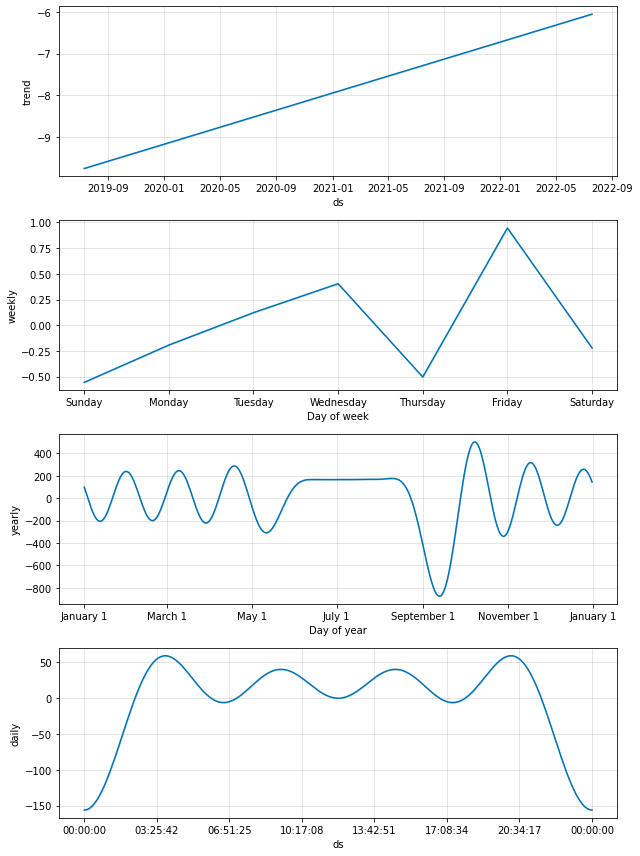

In [ ]:
plt2 = m_sapi.plot_components(forecast_sapi)

In [ ]:
# Show the Actual Value for Qurban Sapi
sapi[sapi.ds == '2021-07-19' ]['y']

76    3
Name: y, dtype: int64

In [ ]:
# Merge the Predict and Actual table for Qurban
left_join_s = pd.merge(forecast_sapi, sapi, on ='ds', how ='left')
left_join_s.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
0,2019-07-11,-9.757686,-2.687895,1.804144,-9.757686,-9.757686,9.329118,9.329118,9.329118,-156.233425,...,-0.503019,-0.503019,166.065563,166.065563,166.065563,0.0,0.0,0.0,-0.428568,2.0
1,2019-07-12,-9.754328,-1.192460,3.310882,-9.754328,-9.754328,10.887773,10.887773,10.887773,-156.233425,...,0.945100,0.945100,166.176098,166.176098,166.176098,0.0,0.0,0.0,1.133445,1.0
2,2019-07-15,-9.744254,-1.503662,2.988232,-9.744254,-9.744254,10.358112,10.358112,10.358112,-156.233425,...,-0.192328,-0.192328,166.783865,166.783865,166.783865,0.0,0.0,0.0,0.613858,1.0
3,2019-07-19,-9.730821,0.575732,5.226837,-9.730821,-9.730821,12.523539,12.523539,12.523539,-156.233425,...,0.945100,0.945100,167.811864,167.811864,167.811864,0.0,0.0,0.0,2.792717,2.0
4,2019-07-20,-9.727463,-0.405055,4.258336,-9.727463,-9.727463,11.554184,11.554184,11.554184,-156.233425,...,-0.220866,-0.220866,168.008475,168.008475,168.008475,0.0,0.0,0.0,1.826721,2.0


In [ ]:
# Show Predict and Actual for Qurban 
left_join_s[['ds','y','yhat','yhat_lower','yhat_upper']]

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-07-11,2.0,-0.428568,-2.687895,1.804144
1,2019-07-12,1.0,1.133445,-1.192460,3.310882
2,2019-07-15,1.0,0.613858,-1.503662,2.988232
3,2019-07-19,2.0,2.792717,0.575732,5.226837
4,2019-07-20,2.0,1.826721,-0.405055,4.258336
...,...,...,...,...,...
437,2022-07-15,NaN,5.495108,3.389095,7.792761
438,2022-07-16,NaN,4.598407,2.471726,6.856696
439,2022-07-17,NaN,4.536413,2.252456,6.848090
440,2022-07-18,NaN,5.157938,3.037673,7.478875


### Forecasting Nominal Donasi Hewan **(Kambing)**

In [ ]:
# Select the date and nominal
nominal_kambing = df_hewan.loc[(df_hewan["Kategori"] == "Kambing") & (df_hewan["Jenis_Hewan"] != "Kambing Hidup")].groupby(['ds']).agg(nominal_Hewan=('nominal','sum')).reset_index()

# Rename the features
nominal_kambing.columns = ['ds', 'y']

nominal_kambing

,ds,y
0,2019-07-11,3000000
1,2019-07-16,3000000
2,2019-07-17,5000000
3,2019-07-19,5500000
4,2019-07-20,13500000
...,...,...
93,2021-07-17,51800000
94,2021-07-18,82200000
95,2021-07-19,141300000
96,2021-07-20,25400000


In [ ]:
# Creating the Prophet Object (model)
m_nominal_kambing = Prophet(daily_seasonality=True)

# Fit or train the model
model = m_nominal_kambing.fit(nominal_kambing)
future_nominal_kambing = m_nominal_kambing.make_future_dataframe(periods=365,freq='D')
forecast_nominal_kambing = m_nominal_kambing.predict(future_nominal_kambing)

forecast_nominal_kambing.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-11,-5.140480e+07,-4.027764e+07,1.449353e+07,-5.140480e+07,-5.140480e+07,3.915744e+07,3.915744e+07,3.915744e+07,-8.223849e+08,...,2.315597e+06,2.315597e+06,2.315597e+06,8.592267e+08,8.592267e+08,8.592267e+08,0.0,0.0,0.0,-1.224737e+07
1,2019-07-16,-5.112150e+07,-2.578985e+07,2.708447e+07,-5.112150e+07,-5.112150e+07,5.003874e+07,5.003874e+07,5.003874e+07,-8.223849e+08,...,-2.837454e+06,-2.837454e+06,-2.837454e+06,8.752611e+08,8.752611e+08,8.752611e+08,0.0,0.0,0.0,-1.082756e+06
2,2019-07-17,-5.106484e+07,-2.321376e+07,2.935800e+07,-5.106484e+07,-5.106484e+07,5.318379e+07,5.318379e+07,5.318379e+07,-8.223849e+08,...,-2.433907e+06,-2.433907e+06,-2.433907e+06,8.780026e+08,8.780026e+08,8.780026e+08,0.0,0.0,0.0,2.118953e+06
3,2019-07-19,-5.095152e+07,-1.794132e+07,3.645007e+07,-5.095152e+07,-5.095152e+07,5.954739e+07,5.954739e+07,5.954739e+07,-8.223849e+08,...,-1.912110e+05,-1.912110e+05,-1.912110e+05,8.821235e+08,8.821235e+08,8.821235e+08,0.0,0.0,0.0,8.595871e+06
4,2019-07-20,-5.089486e+07,-1.341577e+07,4.030303e+07,-5.089486e+07,-5.089486e+07,6.305889e+07,6.305889e+07,6.305889e+07,-8.223849e+08,...,2.052416e+06,2.052416e+06,2.052416e+06,8.833914e+08,8.833914e+08,8.833914e+08,0.0,0.0,0.0,1.216403e+07


In [ ]:
forecast_nominal_kambing[['ds','yhat','yhat_lower','yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2019-07-11,-1.224737e+07,-4.027764e+07,1.449353e+07
1,2019-07-16,-1.082756e+06,-2.578985e+07,2.708447e+07
2,2019-07-17,2.118953e+06,-2.321376e+07,2.935800e+07
3,2019-07-19,8.595871e+06,-1.794132e+07,3.645007e+07
4,2019-07-20,1.216403e+07,-1.341577e+07,4.030303e+07
5,2019-07-21,6.193184e+06,-1.986667e+07,3.261057e+07
6,2019-07-22,1.700840e+07,-8.653648e+06,4.448758e+07
7,2019-07-23,8.290429e+06,-1.822860e+07,3.600414e+07
8,2019-07-24,8.376579e+06,-1.660247e+07,3.371799e+07
9,2019-07-25,1.275498e+07,-1.210203e+07,3.928063e+07


In [ ]:
# Plot the Data
plot_plotly(m_nominal_kambing, forecast_nominal_kambing)

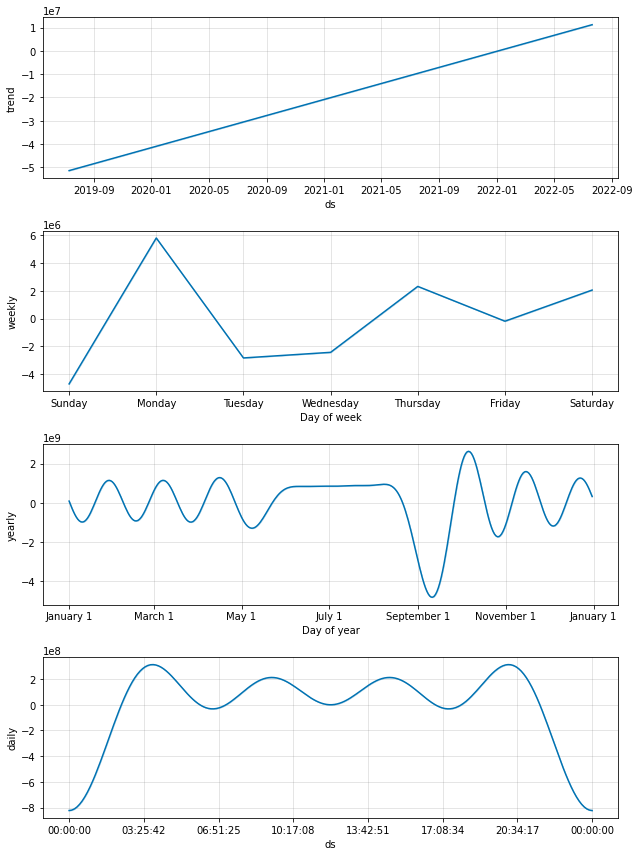

In [ ]:
plt2 = m_nominal_kambing.plot_components(forecast_nominal_kambing)

In [ ]:
# Merge the Predict and Actual table for Qurban
left_join_nominal_k = pd.merge(forecast_nominal_kambing, nominal_kambing, on ='ds', how ='left')
left_join_nominal_k

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
0,2019-07-11,-5.140480e+07,-4.027764e+07,1.449353e+07,-5.140480e+07,-5.140480e+07,3.915744e+07,3.915744e+07,3.915744e+07,-8.223849e+08,...,2.315597e+06,2.315597e+06,8.592267e+08,8.592267e+08,8.592267e+08,0.0,0.0,0.0,-1.224737e+07,3000000.0
1,2019-07-16,-5.112150e+07,-2.578985e+07,2.708447e+07,-5.112150e+07,-5.112150e+07,5.003874e+07,5.003874e+07,5.003874e+07,-8.223849e+08,...,-2.837454e+06,-2.837454e+06,8.752611e+08,8.752611e+08,8.752611e+08,0.0,0.0,0.0,-1.082756e+06,3000000.0
2,2019-07-17,-5.106484e+07,-2.321376e+07,2.935800e+07,-5.106484e+07,-5.106484e+07,5.318379e+07,5.318379e+07,5.318379e+07,-8.223849e+08,...,-2.433907e+06,-2.433907e+06,8.780026e+08,8.780026e+08,8.780026e+08,0.0,0.0,0.0,2.118953e+06,5000000.0
3,2019-07-19,-5.095152e+07,-1.794132e+07,3.645007e+07,-5.095152e+07,-5.095152e+07,5.954739e+07,5.954739e+07,5.954739e+07,-8.223849e+08,...,-1.912110e+05,-1.912110e+05,8.821235e+08,8.821235e+08,8.821235e+08,0.0,0.0,0.0,8.595871e+06,5500000.0
4,2019-07-20,-5.089486e+07,-1.341577e+07,4.030303e+07,-5.089486e+07,-5.089486e+07,6.305889e+07,6.305889e+07,6.305889e+07,-8.223849e+08,...,2.052416e+06,2.052416e+06,8.833914e+08,8.833914e+08,8.833914e+08,0.0,0.0,0.0,1.216403e+07,13500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,2022-07-17,1.103476e+07,3.466429e+07,8.897027e+07,1.103476e+07,1.103477e+07,5.153192e+07,5.153192e+07,5.153192e+07,-8.223849e+08,...,-4.707532e+06,-4.707532e+06,8.786243e+08,8.786243e+08,8.786243e+08,0.0,0.0,0.0,6.256668e+07,NaN
459,2022-07-18,1.109142e+07,5.031053e+07,1.015135e+08,1.109142e+07,1.109143e+07,6.423350e+07,6.423350e+07,6.423350e+07,-8.223849e+08,...,5.802092e+06,5.802092e+06,8.808163e+08,8.808163e+08,8.808163e+08,0.0,0.0,0.0,7.532492e+07,NaN
460,2022-07-19,1.114808e+07,4.139296e+07,9.433640e+07,1.114808e+07,1.114809e+07,5.726938e+07,5.726938e+07,5.726938e+07,-8.223849e+08,...,-2.837454e+06,-2.837454e+06,8.824917e+08,8.824917e+08,8.824917e+08,0.0,0.0,0.0,6.841746e+07,NaN
461,2022-07-20,1.120474e+07,4.380904e+07,9.637782e+07,1.120474e+07,1.120475e+07,5.880466e+07,5.880466e+07,5.880466e+07,-8.223849e+08,...,-2.433907e+06,-2.433907e+06,8.836235e+08,8.836235e+08,8.836235e+08,0.0,0.0,0.0,7.000940e+07,NaN


In [ ]:
# Show Predict and Actual for Qurban
left_join_nominal_k[['ds','y','yhat','yhat_lower','yhat_upper']]

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-07-11,3000000.0,-1.224737e+07,-4.027764e+07,1.449353e+07
1,2019-07-16,3000000.0,-1.082756e+06,-2.578985e+07,2.708447e+07
2,2019-07-17,5000000.0,2.118953e+06,-2.321376e+07,2.935800e+07
3,2019-07-19,5500000.0,8.595871e+06,-1.794132e+07,3.645007e+07
4,2019-07-20,13500000.0,1.216403e+07,-1.341577e+07,4.030303e+07
...,...,...,...,...,...
458,2022-07-17,NaN,6.256668e+07,3.466429e+07,8.897027e+07
459,2022-07-18,NaN,7.532492e+07,5.031053e+07,1.015135e+08
460,2022-07-19,NaN,6.841746e+07,4.139296e+07,9.433640e+07
461,2022-07-20,NaN,7.000940e+07,4.380904e+07,9.637782e+07


### Forecasting Nominal Donasi Hewan **(Sapi)**

In [ ]:
# Select the date and nominal
nominal_sapi = df_hewan.loc[(df_hewan["Kategori"] == "Sapi") & (df_hewan["Jenis_Hewan"] != "Sapi Hidup")].groupby(['ds']).agg(nominal_Hewan=('nominal','sum')).reset_index()

# Rename the features
nominal_sapi.columns = ['ds', 'y']

nominal_sapi

,ds,y
0,2019-07-11,5000000
1,2019-07-12,2500000
2,2019-07-15,2500000
3,2019-07-19,5000000
4,2019-07-20,5000000
...,...,...
72,2021-07-15,9000000
73,2021-07-16,33000000
74,2021-07-17,6000000
75,2021-07-18,12000000


In [ ]:
# Creating the Prophet Object (model)
m_nominal_sapi = Prophet(daily_seasonality=True)

# Fit or train the model
model = m_nominal_sapi.fit(nominal_sapi)
future_nominal_sapi = m_nominal_sapi.make_future_dataframe(periods=365,freq='D')
forecast_nominal_sapi= m_nominal_sapi.predict(future_nominal_sapi)

forecast_nominal_sapi.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-11,-3.215456e+07,-1.662005e+07,7.096527e+06,-3.215456e+07,-3.215456e+07,2.806898e+07,2.806898e+07,2.806898e+07,-5.144758e+08,...,-4.597999e+06,-4.597999e+06,-4.597999e+06,5.471427e+08,5.471427e+08,5.471427e+08,0.0,0.0,0.0,-4.085584e+06
1,2019-07-12,-3.213293e+07,-7.363460e+06,1.621436e+07,-3.213293e+07,-3.213293e+07,3.651634e+07,3.651634e+07,3.651634e+07,-5.144758e+08,...,3.390530e+06,3.390530e+06,3.390530e+06,5.476016e+08,5.476016e+08,5.476016e+08,0.0,0.0,0.0,4.383406e+06
2,2019-07-15,-3.206803e+07,-1.038353e+07,1.309721e+07,-3.206803e+07,-3.206803e+07,3.311423e+07,3.311423e+07,3.311423e+07,-5.144758e+08,...,-1.452195e+06,-1.452195e+06,-1.452195e+06,5.490422e+08,5.490422e+08,5.490422e+08,0.0,0.0,0.0,1.046198e+06
3,2019-07-19,-3.198151e+07,-4.611057e+06,1.996618e+07,-3.198151e+07,-3.198151e+07,3.974683e+07,3.974683e+07,3.974683e+07,-5.144758e+08,...,3.390530e+06,3.390530e+06,3.390530e+06,5.508321e+08,5.508321e+08,5.508321e+08,0.0,0.0,0.0,7.765322e+06
4,2019-07-20,-3.195987e+07,-8.922477e+06,1.420147e+07,-3.195987e+07,-3.195987e+07,3.460459e+07,3.460459e+07,3.460459e+07,-5.144758e+08,...,-2.088299e+06,-2.088299e+06,-2.088299e+06,5.511687e+08,5.511687e+08,5.511687e+08,0.0,0.0,0.0,2.644721e+06


In [ ]:
forecast_nominal_sapi[['ds','yhat','yhat_lower','yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2019-07-11,-4.085584e+06,-1.662005e+07,7.096527e+06
1,2019-07-12,4.383406e+06,-7.363460e+06,1.621436e+07
2,2019-07-15,1.046198e+06,-1.038353e+07,1.309721e+07
3,2019-07-19,7.765322e+06,-4.611057e+06,1.996618e+07
4,2019-07-20,2.644721e+06,-8.922477e+06,1.420147e+07
5,2019-07-21,3.454704e+06,-8.084285e+06,1.490766e+07
6,2019-07-22,3.797457e+06,-7.967521e+06,1.636266e+07
7,2019-07-23,6.800769e+06,-5.391677e+06,1.853238e+07
8,2019-07-25,1.050899e+06,-1.089679e+07,1.352658e+07
9,2019-07-26,9.179948e+06,-3.194985e+06,2.112820e+07


In [ ]:
# Plot the Data
plot_plotly(m_nominal_sapi, forecast_nominal_sapi)

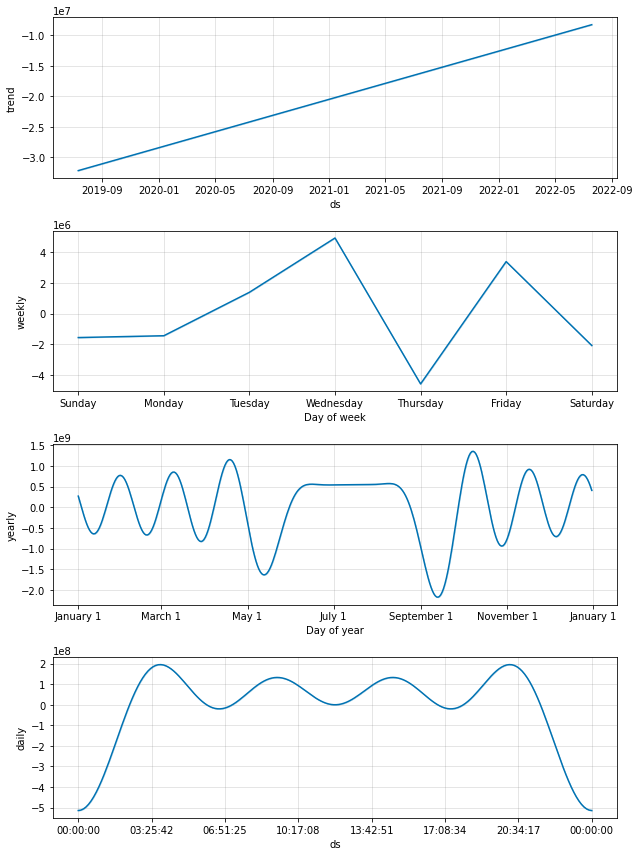

In [ ]:
plt2 = m_nominal_sapi.plot_components(forecast_nominal_sapi)

In [ ]:
# Merge the Predict and Actual table for Qurban
left_join_nominal_s = pd.merge(forecast_nominal_sapi, nominal_sapi, on ='ds', how ='left')
left_join_nominal_s

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
0,2019-07-11,-3.215456e+07,-1.662005e+07,7.096527e+06,-3.215456e+07,-3.215456e+07,2.806898e+07,2.806898e+07,2.806898e+07,-5.144758e+08,...,-4.597999e+06,-4.597999e+06,5.471427e+08,5.471427e+08,5.471427e+08,0.0,0.0,0.0,-4.085584e+06,5000000.0
1,2019-07-12,-3.213293e+07,-7.363460e+06,1.621436e+07,-3.213293e+07,-3.213293e+07,3.651634e+07,3.651634e+07,3.651634e+07,-5.144758e+08,...,3.390530e+06,3.390530e+06,5.476016e+08,5.476016e+08,5.476016e+08,0.0,0.0,0.0,4.383406e+06,2500000.0
2,2019-07-15,-3.206803e+07,-1.038353e+07,1.309721e+07,-3.206803e+07,-3.206803e+07,3.311423e+07,3.311423e+07,3.311423e+07,-5.144758e+08,...,-1.452195e+06,-1.452195e+06,5.490422e+08,5.490422e+08,5.490422e+08,0.0,0.0,0.0,1.046198e+06,2500000.0
3,2019-07-19,-3.198151e+07,-4.611057e+06,1.996618e+07,-3.198151e+07,-3.198151e+07,3.974683e+07,3.974683e+07,3.974683e+07,-5.144758e+08,...,3.390530e+06,3.390530e+06,5.508321e+08,5.508321e+08,5.508321e+08,0.0,0.0,0.0,7.765322e+06,5000000.0
4,2019-07-20,-3.195987e+07,-8.922477e+06,1.420147e+07,-3.195987e+07,-3.195987e+07,3.460459e+07,3.460459e+07,3.460459e+07,-5.144758e+08,...,-2.088299e+06,-2.088299e+06,5.511687e+08,5.511687e+08,5.511687e+08,0.0,0.0,0.0,2.644721e+06,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,2022-07-15,-8.358927e+06,1.793942e+07,4.167991e+07,-8.358928e+06,-8.358926e+06,3.807905e+07,3.807905e+07,3.807905e+07,-5.144758e+08,...,3.390530e+06,3.390530e+06,5.491643e+08,5.491643e+08,5.491643e+08,0.0,0.0,0.0,2.972012e+07,NaN
438,2022-07-16,-8.337295e+06,1.332078e+07,3.765579e+07,-8.337296e+06,-8.337294e+06,3.308319e+07,3.308319e+07,3.308319e+07,-5.144758e+08,...,-2.088299e+06,-2.088299e+06,5.496472e+08,5.496472e+08,5.496472e+08,0.0,0.0,0.0,2.474589e+07,NaN
439,2022-07-17,-8.315663e+06,1.400999e+07,3.777781e+07,-8.315664e+06,-8.315662e+06,3.406500e+07,3.406500e+07,3.406500e+07,-5.144758e+08,...,-1.570374e+06,-1.570374e+06,5.501111e+08,5.501111e+08,5.501111e+08,0.0,0.0,0.0,2.574934e+07,NaN
440,2022-07-18,-8.294030e+06,1.407835e+07,3.894365e+07,-8.294031e+06,-8.294029e+06,3.461298e+07,3.461298e+07,3.461298e+07,-5.144758e+08,...,-1.452195e+06,-1.452195e+06,5.505409e+08,5.505409e+08,5.505409e+08,0.0,0.0,0.0,2.631895e+07,NaN


In [ ]:
# Show Predict and Actual for Qurban
left_join_nominal_s[['ds','y','yhat','yhat_lower','yhat_upper']]

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-07-11,5000000.0,-4.085584e+06,-1.662005e+07,7.096527e+06
1,2019-07-12,2500000.0,4.383406e+06,-7.363460e+06,1.621436e+07
2,2019-07-15,2500000.0,1.046198e+06,-1.038353e+07,1.309721e+07
3,2019-07-19,5000000.0,7.765322e+06,-4.611057e+06,1.996618e+07
4,2019-07-20,5000000.0,2.644721e+06,-8.922477e+06,1.420147e+07
...,...,...,...,...,...
437,2022-07-15,NaN,2.972012e+07,1.793942e+07,4.167991e+07
438,2022-07-16,NaN,2.474589e+07,1.332078e+07,3.765579e+07
439,2022-07-17,NaN,2.574934e+07,1.400999e+07,3.777781e+07
440,2022-07-18,NaN,2.631895e+07,1.407835e+07,3.894365e+07
